# Video Game sales ANALYSIS

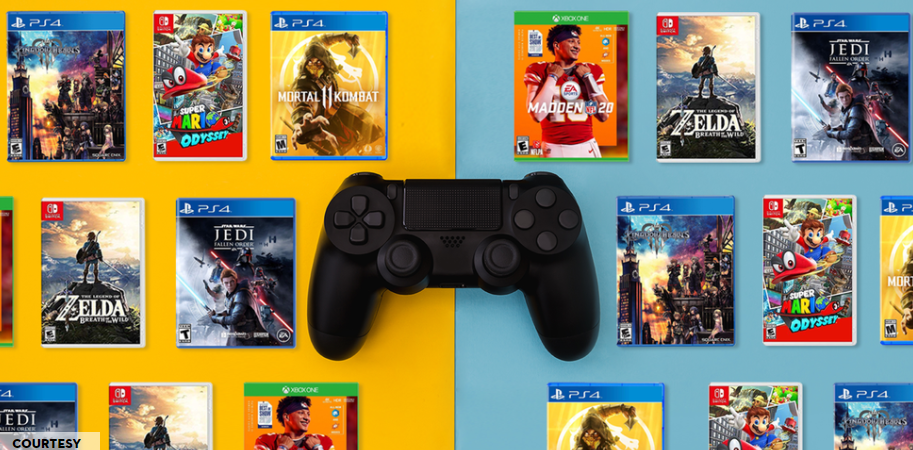

In [4]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
#loading the dataset
vgames_data=pd.read_csv('vgsales.csv')
vgames_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


Data preparation and Cleaning

In [7]:
vgames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [24]:
vgames_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [25]:
#dropping the null values

vgames_data.dropna( axis=0, how="any", thresh=None, subset=['Year','Publisher'], inplace=True)


In [26]:
vgames_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [27]:
vgames_data.shape

(16291, 11)

In [28]:
vgames_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**<font color=aquamarine>For analyzing we are taking only Global sales.**


In [29]:
vgames_data.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1,inplace=True)
vgames_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [30]:
#groupping by age
year_by_sales=vgames_data.groupby('Year').sum()
year_by_sales.drop('Rank',axis=1,inplace=True)
year_by_sales

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


<font color=pink>From the above table we get the idea of sales per year(in millions) over 40 years.IN year 2008 the maximum no. of sales happened with 678 millions.</font>

In [31]:
#groupping by platform
sales_on_platforms=vgames_data.groupby('Platform').sum()
sales_on_platforms.drop(['Year','Rank'],axis=1,inplace=True)
sales_on_platforms

,Global_Sales
Platform,
2600,86.57
3DO,0.10
3DS,246.27
DC,15.97
DS,818.91
GB,254.42
GBA,305.62
GC,197.14
GEN,28.36


<font color=pink>From the above table we get the idea of sales over different platforms. PS2 platform has the maximum sales all over the globe.</font>

In [114]:
max_p=vgames_data.groupby('Platform').max()
max_p


,Rank,Name,Year,Genre,Publisher,Global_Sales
Platform,,,,,,
2600,11751,Yars' Revenge,1989.0,Sports,Wizard Video Games,7.81
3DO,15482,Sotsugyou II: Neo Generation Special,1995.0,Simulation,Micro Cabin,0.06
3DS,16581,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,2016.0,Strategy,"mixi, Inc",14.35
DC,15902,Virtua Striker 2,2008.0,Sports,Warashi,2.42
DS,16599,¡Shin Chan Flipa en colores!,2020.0,Strategy,iWin,30.01
GB,12672,Yu-Gi-Oh: Duel Monsters 4,2001.0,Strategy,Victor Interactive,31.37
GBA,16600,everGirl,2007.0,Strategy,Zoo Digital Publishing,15.85
GC,16597,ZooCube,2007.0,Strategy,Zoo Digital Publishing,7.07
GEN,14419,Yuu Yuu Hakusho: Makyo Toitsusen,1994.0,Strategy,Virgin Interactive,6.03


<font color=pink>This table shows the best selling games on each platforms.

In [33]:
sales_per_genre=vgames_data.groupby('Genre').sum()
sales_per_genre.drop(['Rank','Year'],axis=1,inplace=True)
sales_per_genre= pd.DataFrame(sales_per_genre)
sales_per_genre

,Global_Sales
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83
Shooter,1026.20


<font color=pink>The action genre has the best selling games.

In [34]:
vgames_data.groupby('Genre').max()

,Rank,Name,Platform,Year,Publisher,Global_Sales
Genre,,,,,,
Action,16592,inFAMOUS: Second Son,XOne,2017.0,"mixi, Inc",21.40
Adventure,16594,iCarly 2: iJoin The Click!,XOne,2016.0,imageepoch Inc.,11.18
Fighting,16566,Zero Divide,XOne,2016.0,Zoo Digital Publishing,13.04
Misc,16545,uDraw Studio: Instant Artist,XOne,2016.0,Zushi Games,29.02
Platform,16600,¡Shin Chan Flipa en colores!,XOne,2016.0,Zoo Digital Publishing,40.24
Puzzle,16599,th!nk Logic Trainer,XB,2015.0,iWin,30.26
Racing,16598,nail'd,XOne,2016.0,bitComposer Games,35.82
Role-Playing,16593,Zwei!!,XOne,2017.0,inXile Entertainment,31.37
Shooter,16597,Zone of the Enders,XOne,2016.0,id Software,28.31


<font color=pink>This table shows the best selling games in each genre
for e.g= in action genre "inFAMOUS: Second Son" is the most selling video game and it is on the XOne platform.

# Visualizations

In [35]:
vgames_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [98]:
plt.style.use('grayscale')


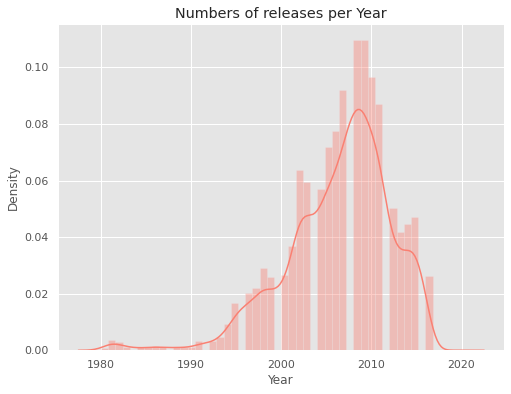

In [72]:
plt.figure(figsize=(8,6))
plt.title("Numbers of releases per Year")
sns.distplot(vgames_data['Year'],color='salmon');

*IN year 2008 and 2009 most number of games had been relased.*

Text(0.5, 1.0, 'Global Sales over the years')

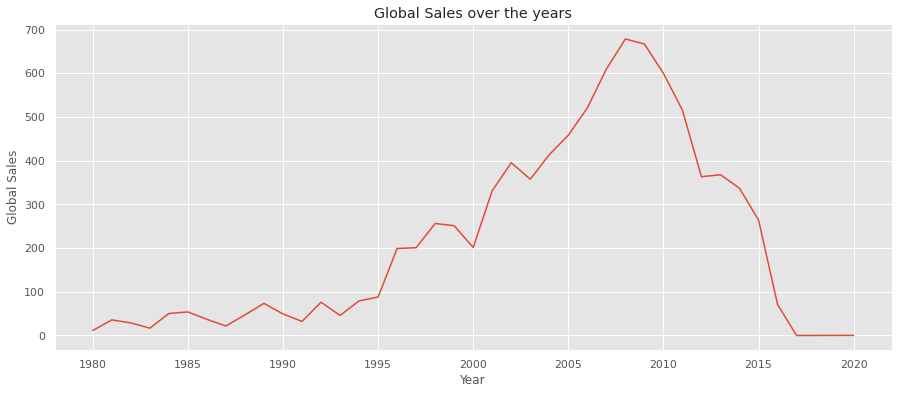

In [73]:
ax=plt.figure(figsize=(15,6))
vgames_data.groupby(['Year'])['Global_Sales'].sum().plot()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')

*From the above graph it is clear that the maximum sales has happened around 2007 to 2009.*

Text(0.5, 1.0, 'Sales of different genre Globally')

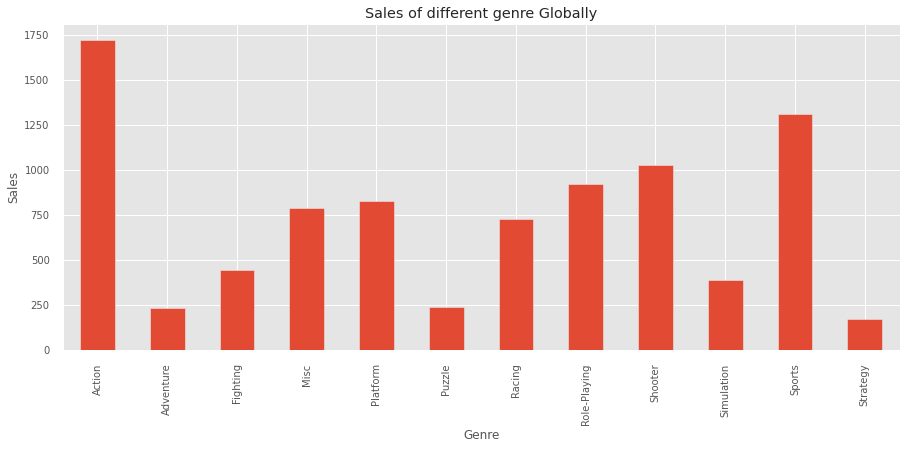

In [88]:
ax=plt.figure(figsize=(15,6))
vgames_data.groupby(['Genre'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

*Action and Sports are the best selling genres.*

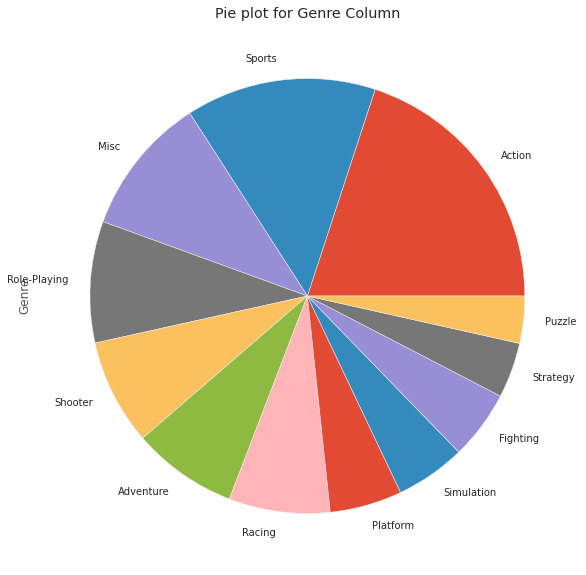

In [89]:
plt.figure(figsize=(20,10))
plt.title("Pie plot for Genre Column")
vgames_data.Genre.value_counts().plot(kind="pie");

*In action Genre the most games had released.* 

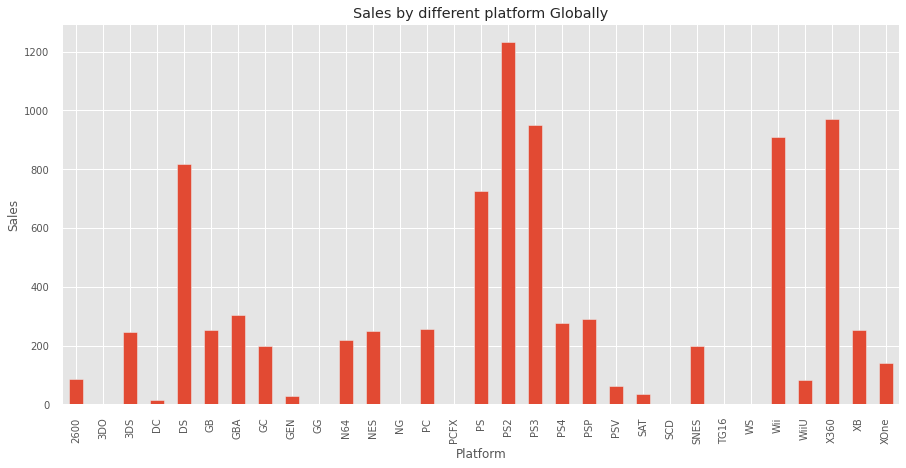

In [90]:
ax=plt.figure(figsize=(15,7))
vgames_data.groupby(['Platform'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales by different platform Globally');

*PS2 has done the best sales globally.*

Text(0.5, 1.0, 'Sales by top 10 publishers Globally')

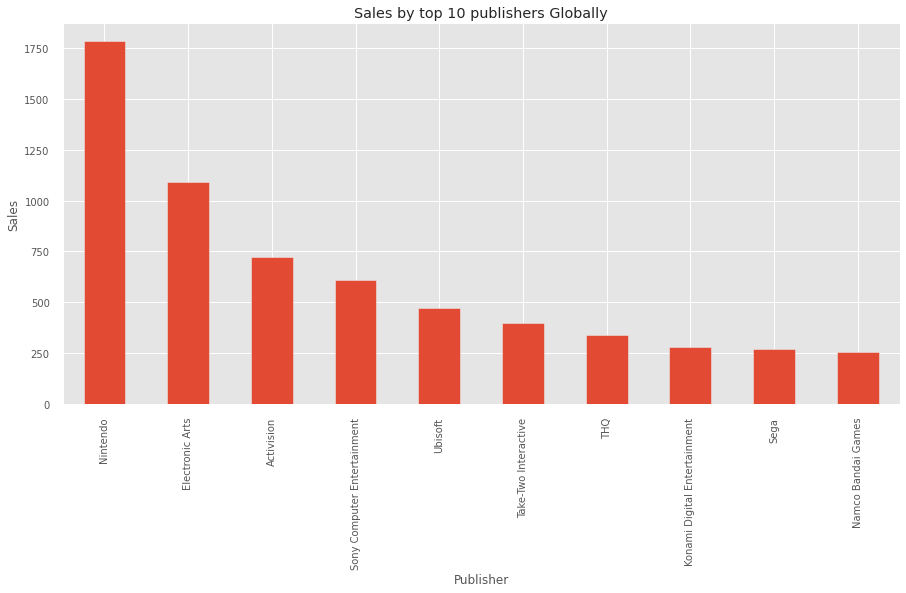

In [91]:
ax=plt.figure(figsize=(15,7))
vgames_data.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales by top 10 publishers Globally')

*Above are the top 10 publishers with highest sales.Nintendo has around 1750 million sales.*

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

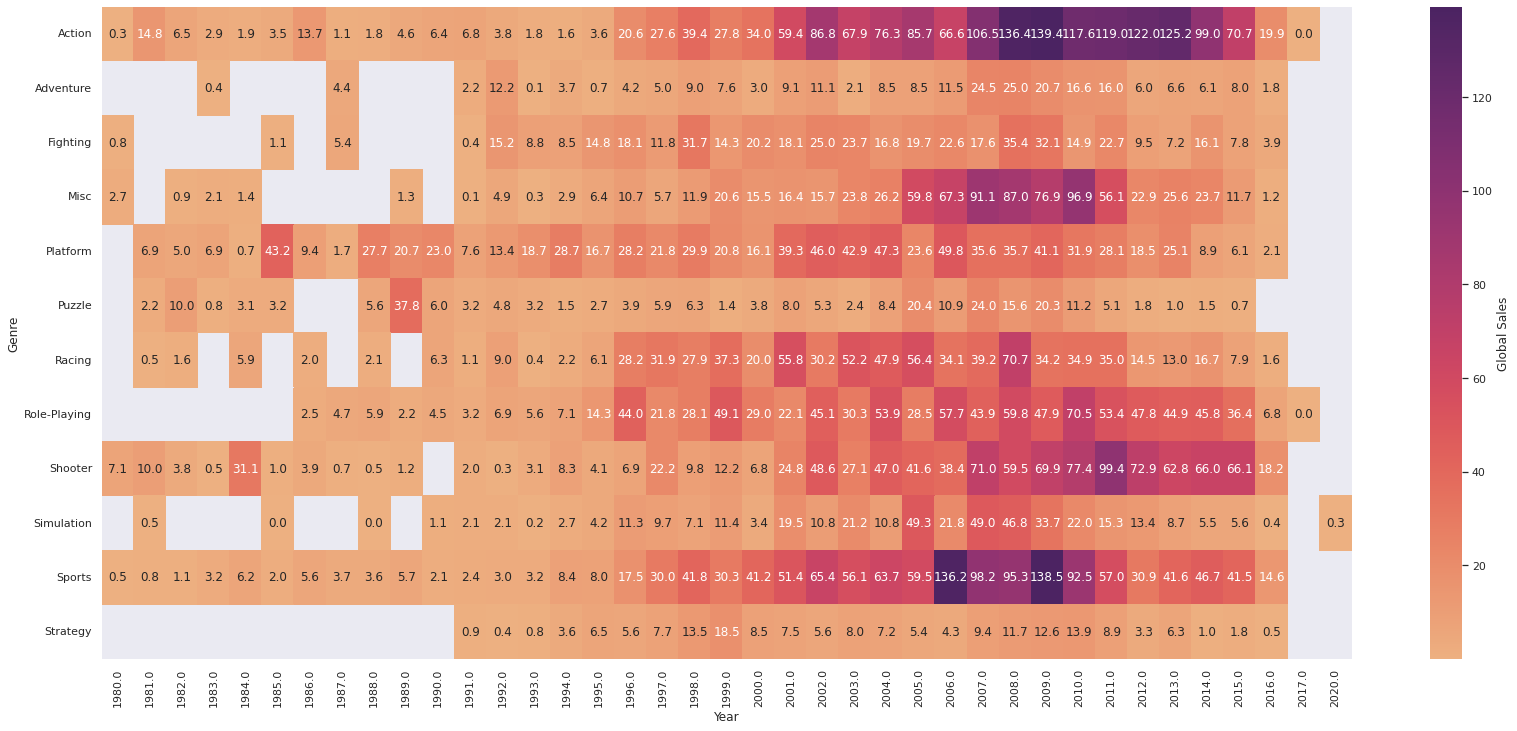

In [43]:
data=vgames_data.groupby ([ 'Year','Genre']) ['Global_Sales'].sum().unstack (['Year'])
# set plot dimensions
plt.figure (figsize =[28, 12])
sns.heatmap (data,
          annot=True ,fmt='.1f',
          cmap='flare',
          cbar_kws={'label': 'Global Sales'});
plt.yticks(rotation=0)

*The above heatmap shows games released for every genre in each year.*

# Answering some questions.







Q1)In which genre there is maximum sales?


Ans: The action has the best sales with 1722 million.

In action genre the no. of games released is also maximum.



In [48]:
vgames_data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head()

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Name: Global_Sales, dtype: float64

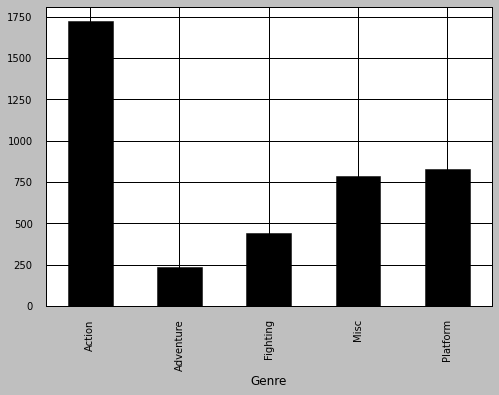

In [99]:
vgames_data.groupby('Genre')['Global_Sales'].sum().head().plot(kind='bar')

Q2)In which Year the video game industry experienced the most sales?

Ans:IN year 2008 the this industry experienced highest sales with 678 millions.

In [47]:
vgames_data.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).head()

Year
2008.0    678.90
2009.0    667.30
2007.0    609.92
2010.0    600.29
2006.0    521.04
Name: Global_Sales, dtype: float64

Q3)Which are the top 5 platforms on the basis of Gloabal Sales?

Ans:



1.   Ps2 with 1233 million.
2.   X360 with 969 million.
3.   PS3 with 949 million.
4.   Wii with 909 million.
5.   DS with 818 million.





In [53]:
sales_on_platforms.sort_values(by='Global_Sales',ascending=False).head()

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91


Q4)Which are the top 5 publishers on the basis of Global sales?

Ans:

1.   Nintendo with 1784 million.
2.   Electronic Arts with 1093 million.
3.   Activision with 721 million.
4.   Sony Computer Entertainment with 607 million.
5.   Ubisoft with 437 million.



In [56]:
vgames_data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head()

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Name: Global_Sales, dtype: float64

Q5)IN which Year maximum number of releases is seen?

Ans:IN year 2009 with 1431 new game releases.

Text(0.5, 1.0, 'Global Sales over the years')

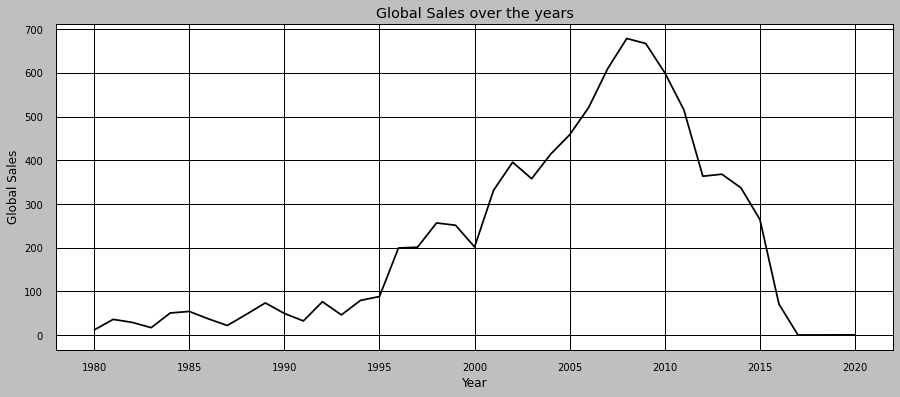

In [100]:
ax=plt.figure(figsize=(15,6))
vgames_data.groupby(['Year'])['Global_Sales'].sum().plot()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')

Q6)IN Ps2 platform which is the best selling game?

Ans: pro evolution soccer 2011 is the best selling game on PS2 platform released in 2011,with 20 million sales.

In [122]:
max_p[max_p['Global_Sales']>20].iloc[3,:]

Rank                                16598
Name            pro evolution soccer 2011
Year                                 2011
Genre                            Strategy
Publisher                    responDESIGN
Global_Sales                        20.81
Name: PS2, dtype: object

# Summary

This project gave me a basic idea of gaming industry,I learned a lot of new things while doing this project.

In [125]:
jovian.commit()

NameError: ignored